## Описание проекта

Задача: отделу маркетинговой аналитики Яндекс.Афиши необходимо снизить расходы, поэтому проанализируем от каких невыгодных источников трафика можно отказаться и как перераспределить бюджет.

Необходимо исследовать:
* как клиенты пользуются сервисом;
* когда делают первые покупки на сайте;
* сколько денег приносит компании каждый клиент;
* когда расходы на привлечение клиента окупаются.

Посчитаем метрики трёх видов:
* продуктовые;
* метрики электронной коммерции;
* маркетинговые.

В результате сформулируем выводы и рекомендации по результатам подсчета метрик, относительно источников трафика на которые маркетологам стоит делать упор, и определим самые перспективные для компании когорты клиентов.

**Описание данных**

Имеются данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши;
* выгрузка всех заказов за этот период;
* статистика рекламных расходов.

Выручка измеряется в условных единицах — у.е.

Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

Структура visits_log.csv:
* Uid — уникальный идентификатор пользователя;
* Device — категория устройства пользователя;
* Start Ts — дата и время начала сессии;
* End Ts — дата и время окончания сессии;
* Source Id — идентификатор источника перехода на сайт.

Структура orders_log.csv:
* Uid — уникальный идентификатор пользователя;
* Buy Ts — дата и время заказа;
* Revenue — сумма заказа.

Структура costs.csv:
* source_id — идентификатор рекламного источника;
* dt — дата проведения рекламной кампании;
* costs — расходы на эту кампанию.

## Загрузим данные и подготовим их к анализу

**Импортируем библиотеки**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Прочитаем данные из файлов и сохраним их**

In [2]:
visit = pd.read_csv('/datasets/visits_log.csv')
order = pd.read_csv('/datasets/orders_log.csv')
cost = pd.read_csv('/datasets/costs.csv')

**Выведем таблицы, их общую информацию и посмотрим нулевые значения, пропуски, дубликаты**

In [3]:
def total_info(df, name_list):
    print('Таблица', name_list)
    display(df.head())
    print('Общая информация таблицы', name_list)
    display(df.info())
    print('Hаличие нулевых обьектов в таблице', name_list)
    display(df.isnull().sum())
    print('Наличие пропусков в таблице', name_list)
    display(df.isna().sum())
    print('Hаличие дубликатов в таблице', name_list)
    display(df.duplicated().sum())

Для таблицы visit

In [4]:
total_info(visit, 'visit')

Таблица visit


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Общая информация таблицы visit
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Hаличие нулевых обьектов в таблице visit


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Наличие пропусков в таблице visit


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Hаличие дубликатов в таблице visit


0

* Видим, что нужно изменить названия столбцов: убрать пробелы, поменять регистр.
* Изменить тип данных в столбцах со временем.
* В таблице нет нулевых объектов, пропусков и дубликатов.

Для таблицы order

In [5]:
total_info(order, 'order')

Таблица order


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Общая информация таблицы order
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Hаличие нулевых обьектов в таблице order


Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Наличие пропусков в таблице order


Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Hаличие дубликатов в таблице order


0

* Тоже видим, что нужно изменить названия столбцов: убрать пробелы, поменять регистр.
* Изменить тип данных в столбцах со временем.
* В таблице нет нулевых объектов, пропусков и дубликатов.

Для таблицы cost

In [6]:
total_info(cost, 'cost')

Таблица cost


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Общая информация таблицы cost
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

Hаличие нулевых обьектов в таблице cost


source_id    0
dt           0
costs        0
dtype: int64

Наличие пропусков в таблице cost


source_id    0
dt           0
costs        0
dtype: int64

Hаличие дубликатов в таблице cost


0

* Изменить тип данных в столбцах со временем.
* В таблице нет нулевых объектов, пропусков и дубликатов.

**Приведем наши таблицы к корректному названию столбцов и правильному формату данных**

In [7]:
visit.columns = visit.columns.str.lower()
visit.columns = visit.columns.str.replace(' ', '_')

order.columns = order.columns.str.lower()
order.columns = order.columns.str.replace(' ', '_')

cost = cost.rename(columns={'dt':'data'})

display(visit.head())
display(order.head())
display(cost.head())

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,data,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Изменим тип данных на datatime

In [8]:
visit['end_ts'] = pd.to_datetime(visit['end_ts'])
visit['start_ts'] = pd.to_datetime(visit['start_ts'])
visit.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

In [9]:
order['buy_ts'] = pd.to_datetime(order['buy_ts'])
order.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

In [10]:
cost['data'] = pd.to_datetime(cost['data'])
cost.dtypes

source_id             int64
data         datetime64[ns]
costs               float64
dtype: object

**Вывод**
* В наших данных нет нулевых объектов, пропущенных значений и дубликатов;
* Переименовали названия столбцов, убрали пробелы, поменяли регистр;
* Изменим тип данных на datatime.

## Рассчитаем метрики и построим графики

### Продуктовые метрики

* Сколько людей пользуются в день, неделю, месяц?
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

#### **Сколько людей пользуются в день, неделю, месяц?**

**Добавим колонки день, неделя, месяц и год в таблицу visit и рассчитаем в среднем количество уникальных пользователей в день, неделю, месяц (DAU, WAU и MAU)**

In [11]:
visit['day'] = visit['start_ts'].dt.day
visit['date'] = visit['start_ts'].dt.date
dau_total = visit.groupby('date').agg({'uid': 'nunique'})
dau_total.columns = ['dau']

visit['month'] = visit['start_ts'].dt.month
visit['week'] = visit['start_ts'].dt.week
wau_total = visit.groupby(['month', 'week']).agg({'uid': 'nunique'})
wau_total.columns = ['wau']

visit['year'] = visit['start_ts'].dt.year
mau_total = visit.groupby(['year', 'month']).agg({'uid': 'nunique'})
mau_total.columns = ['mau']

print('Пользователей в день в среднем (DAU):', int(dau_total.mean()), 'человек.')
print('Пользователей в неделю в среднем (WAU):', int(wau_total.mean()), 'человек.')
print('Пользователей в месяц в среднем (MAU):', int(mau_total.mean()), 'человек.')

/tmp/ipykernel_195/3163615493.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visit['week'] = visit['start_ts'].dt.week


Пользователей в день в среднем (DAU): 907 человек.
Пользователей в неделю в среднем (WAU): 4911 человек.
Пользователей в месяц в среднем (MAU): 23228 человек.


В результате расчета метрик мы получили, что для нашего сервиса:
* среднее количество пользователей в день (DAU) составляет: 907 человек;
* среднее количество пользователей в неделю (WAU) составляет: 4911 человек;
* среднее количество пользователей в месяц (MAU) составляет: 23228 человек.

**Теперь построим графики, отображающие изменение метрик во времени**

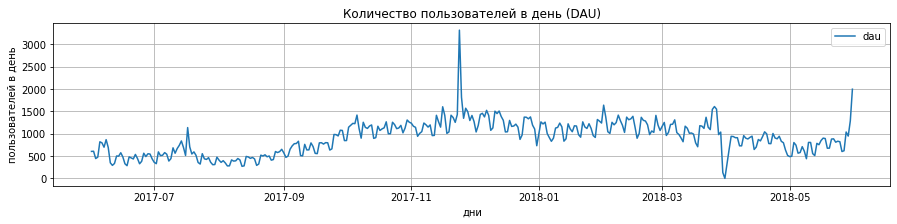

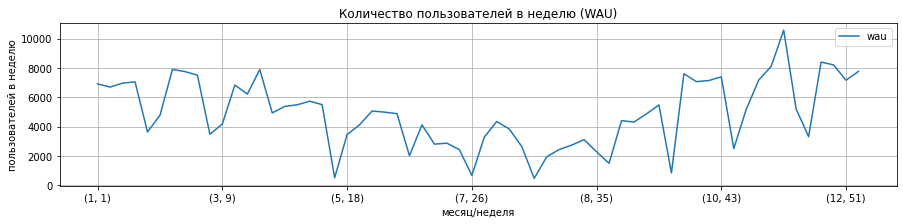

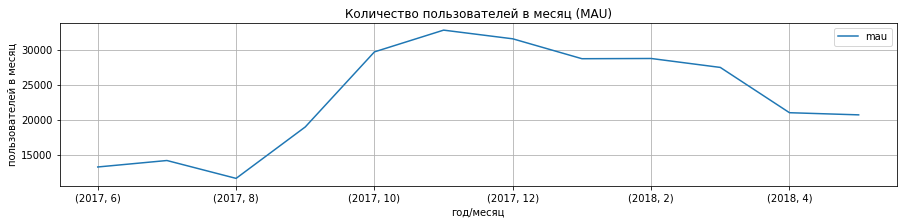

In [12]:
dau_total.plot(grid=True, title='Количество пользователей в день (DAU)', figsize=(15, 3))
plt.xlabel('дни')
plt.ylabel('пользователей в день')
plt.show()

wau_total.plot(grid=True, title='Количество пользователей в неделю (WAU)', figsize=(15, 3))
plt.xlabel('месяц/неделя')
plt.ylabel('пользователей в неделю')
plt.show()

mau_total.plot(grid=True, title='Количество пользователей в месяц (MAU)', figsize=(15, 3))
plt.xlabel('год/месяц')
plt.ylabel('пользователей в месяц')
plt.show()

* Количество пользователей в день (DAU): по графику видно, что было несколько скачков, когда посетителей в разы больше и день, когда количество пользователей упало до нуля, что может быть связано с техническими неполадками, в то время как скачок количества посетителей может быть связан с какой-либо премьерой.

* Количество пользователей в неделю (WAU): по графику видно, что основной пик посещений приходится на середину ноября, когда люди начинают готовиться к Новому году и интересуются предновогодними мероприятиями и событиями, также второй пик наблюдает в середине марта, что может быть связано с предстоящими премьерами.

* Количество пользователей в месяц (MAU): в летний период количество пользователь сильно снижается, наименьшее количество посетителей наблюдается с июня по август, что может быть связано с отпусками и летними каникулами. Начиная с сентября число посетителей возрастает и держится высоким до января.

#### **Сколько сессий в день?**

**Рассчитаем количество сессий в день**

In [13]:
session_count = visit.groupby('date').agg({'uid': 'count'}).mean()
print('В день в среднем проходит {0:.3f} сессий'.format(session_count[0]))

В день в среднем проходит 987.363 сессий


Пользователи совершают в среднем 987 сессий в день.

**Определим сколько раз за день пользователи в среднем заходят на сайт**

In [14]:
sessions_per_user = visit.groupby(['month', 'day']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print(sessions_per_user['sessions_per_user'].mean())

1.0821696440039719


Таким образом, мы получили, что в день среднее количество сессий равно 1, то есть один пользователь пользуются сервисом в среднем один раз в день.

**Построим график, отражающий изменения метрики во времени**

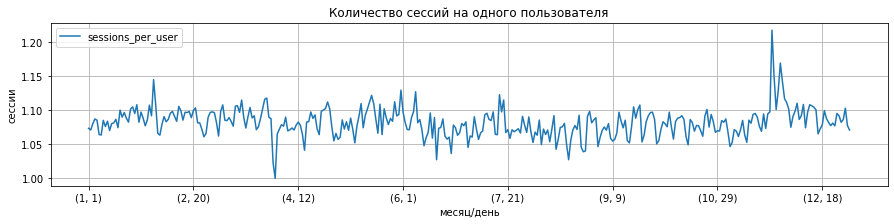

In [15]:
sessions_per_user['sessions_per_user'].plot(grid=True, 
                                            title='Количество сессий на одного пользователя', 
                                            figsize=(15, 3), 
                                            legend=True)
plt.xlabel('месяц/день')
plt.ylabel('сессии')
plt.show()

По графику видно, что количество сессий стабильно по месяцам.

#### **Сколько длится одна сессия?**

**Найдем среднюю продолжительность сессии (ASL), чтобы посмотреть сколько длится сессия пользователя в среднем**

In [16]:
visit['duration'] = (visit['end_ts'] - visit['start_ts']).dt.seconds
print('Средняя прододжительность сессии (ASL):', int(visit['duration'].mean()), 'секунды')

Средняя прододжительность сессии (ASL): 643 секунды


Таким образом, мы получили, что средняя продолжительность пользовательской сессии составляет 643.5 секунды или 10.7 минут.

**Построим график распределения**

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64


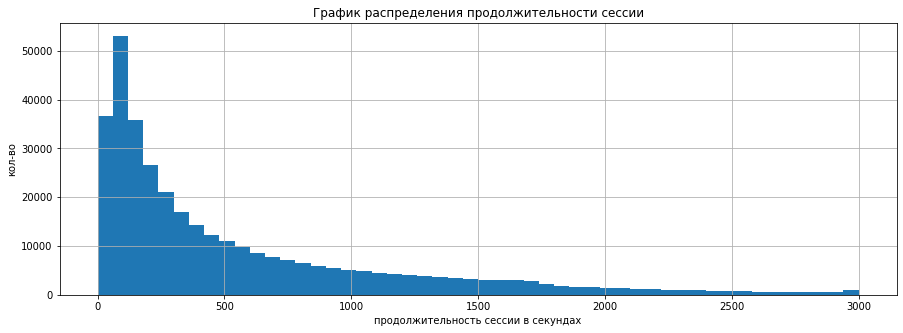

In [17]:
plt.figure(figsize=(15, 5))
plt.title('График распределения продолжительности сессии', fontsize=12)
plt.xlabel('продолжительность сессии в секундах')
plt.ylabel('кол-во')
visit['duration'].hist(bins=50, range=(0, 3000))
print(visit['duration'].describe())

Видим, что распределение далеко от нормального, поэтому рассчитаем моду (значение в выборке, которое встречается чаще всего).

**Рассчитаем моду продолжительности сессии**

In [18]:
print('Мода продолжительности сессии:', int(visit['duration'].mode()), 'секунд')

Мода продолжительности сессии: 60 секунд


Средняя продолжительность одной сессии составляет 10.7 минут, медиана - 5 минут, мода (наиболее часто встречающееся значение) составляет всего 1 минуту. Провести одну минуту на сайте можно, когда человек завершает покупку переходом на Яндекс.Афишу и оплачивает ее там. Самая длинная сессия продолжалась 84480 секунды, то есть почти целые сутки. Возможно, что просто кто-то не закрыл вкладку. В целом, такое распределение говорит о том, что сессии достаточно непродолжительные.

**Для расчета длительности сессиии берем медиану. В нашем случае она составляет 300 секунд или 5 минут.**

In [19]:
print('Медиана продолжительности сессии:', int(visit['duration'].median()), 'секунд')

Медиана продолжительности сессии: 300 секунд


Медиана продолжительности сессии составляет 5 минут.

#### **Как часто люди возвращаются?**

**Рассчитаем Retention Rate, чтобы понять сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды и создадим тепловую карту**

6.516659710392834


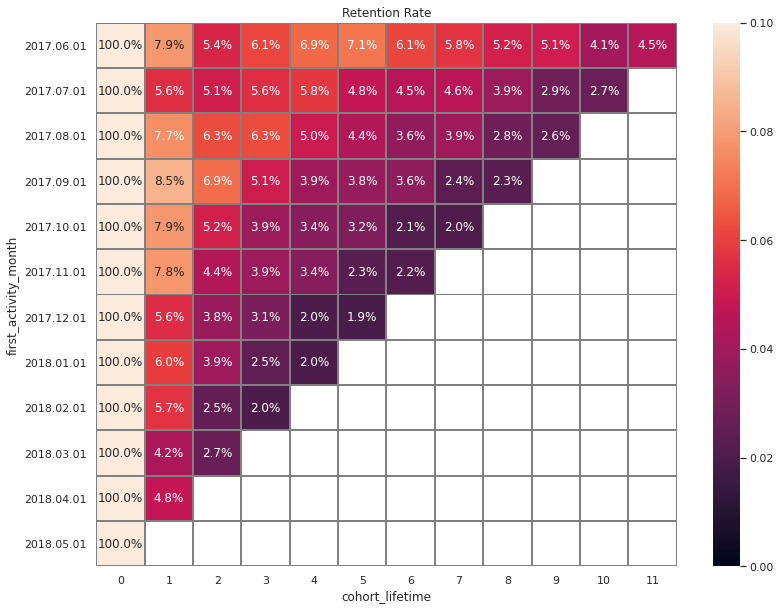

In [20]:
# возьмем дату, когда пользователь впервые проявил активность
visit_first_activity_date = visit.groupby(['uid'])['start_ts'].min()
visit_first_activity_date.name = 'first_activity_date'

visit_first_activity_date_gr = visit.groupby('uid').agg({'start_ts':'min'}).reset_index()
visit_first_activity_date_gr = visit_first_activity_date_gr.set_index('uid')

# присоеденим эти данные к исходной таблице
visit = visit.join(visit_first_activity_date, on='uid')

# обьеденим пользователей в когорты по месяцам посмотрим удержание по месяцам добавим столбец с месяцем когорты
visit['activity_month'] = visit['start_ts'].astype('datetime64[M]') 
visit['first_activity_month'] = visit['first_activity_date'].astype('datetime64[M]')

# рассчитаем lifetime пользователя в рамках когорты 
visit['cohort_lifetime'] = visit['activity_month'] - visit['first_activity_month']

# переведем время в целые месяцы
visit['cohort_lifetime'] = visit['cohort_lifetime'] / np.timedelta64(1,'M')
visit['cohort_lifetime'] = visit['cohort_lifetime'].round().astype('int')

# cгруппируем данные по когорте и lifetime
# посчитаем для каждой когорты количество активных пользователей на определенный «месяц жизни»
cohorts = visit.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# найдем исходное количество пользователей в когорте. Возьмём их число на нулевой месяц
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

# переименуем методом rename
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

# объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

# рассчитаем Retention Rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

# построим сводную таблицу и создадим тепловую карту
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 10))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.1,
            yticklabels=retention_pivot.index.strftime('%Y.%m.%d'))

# cредний Retention Rate на второй «месяц жизни» когорт
mean_retention_for_1_cohort = (cohorts[cohorts['cohort_lifetime'] == 1]['retention']).mean()*100
print(mean_retention_for_1_cohort)

Количество вернувшихся клиентов в среднем (Retention Rate) в первой когорте составляет 6.5 %. Во второй, третьей и последующих когортах Retention Rate убывает быстрее, то есть клиенты неохотно пользуется сервисов повторно, что не очень хорошо для потенциальной выручки. Таким образом, получается, что летние посетители наиболее часто возвращаются на сайт. Если для когорты пользователей, которые пришли в сентябре Retention Rate составляет 8.5%, то для тех пользователей, что пришли в марте уже в два раза меньше, то есть 4.2%. В первой когорте пользователи удерживались лучше всего: на 12 месяце жизни когорты показатель 4.5 - это больше, чем на старте мартовской когорты.

**Вывод**

**1. Сколько людей пользуются сервисом в день, неделю, месяц?**
* Среднее количество пользователей в день (DAU) составляет: 907 человек;
* Cреднее количество пользователей в неделю (WAU) составляет: 4911 человек;
* Среднее количество пользователей в месяц (MAU) составляет: 23228 человек.

**2. Сколько сессий в день?**
* В день в среднем проходит 987 сессий

**3. Сколько раз за день пользователи в среднем заходят на сайт?**
*  Один пользователь пользуются сервисом в среднем один раз в день.

**4. Сколько длится одна сессия?**
* Средняя продолжительность пользовательской сессии (ASL) составляет 10.7 минут, медиана - 5 минут, мода составляет 1 минуту.
Так как распределение имеет экспоненциальный вид при расчете продолжительности сессии мы будем ориентироваться на медиану. В нашем случае медиана продолжительности сессии составляет 5 минут. В целом, сессии достаточно непродолжительные. 

**5. Как часто люди возвращаются?**
* У нашего сервиса низкий Retention Rate. Количество вернувшихся клиентов в среднем (Retention Rate) в первой когорте составляет 6.5 %. Во второй, третьей и последующих когортах Retention Rate убывает быстрее, то есть количество возвращающихся клиентов падает, особенно в зимние месяцы. Таким образом, получается, что летние посетители наиболее часто возвращаются на сайт. 

### Метрики электронной коммерции

* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

#### Когда люди начинают покупать?

**Исследуем сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки**

Найдем время, прошедшее с момента первой сессии до первой покупки и построим график

Медиана времени с первой сессии до первой покупки: 16 минут
Среднее время с певрой сессии до первой покупки: 16 дней
Мода времени с певрой сессии до первой покупки: 1 минута


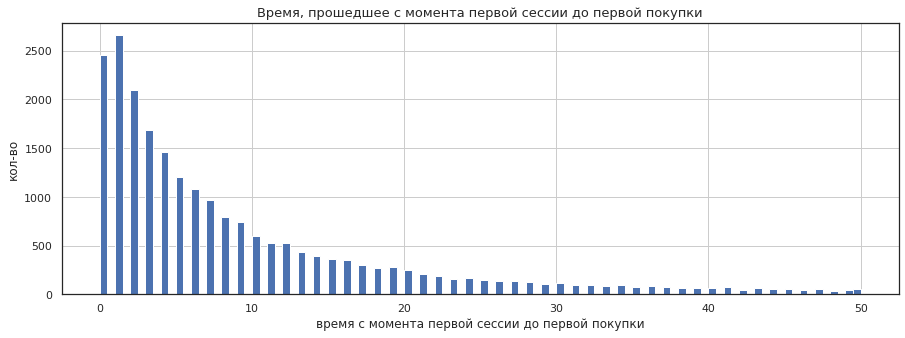

In [21]:
# найдем время и дату первой сессии 
first_sessions = visit.groupby(['uid']).agg({'start_ts':'min', 'source_id':'first'})
first_sessions.columns = ['first_activity', 'first_source']

# найдем время первой покупки
first_orders = order.groupby(['uid']).agg({'buy_ts':'min'})
first_orders.columns = ['first_buy_ts']

# добавим дату и время первой сессии в информацию по первым заказам
first_orders = first_orders.join(first_sessions,on='uid')

# рассчитываем и строим график
first_orders['time_to_first_purchase'] = (first_orders['first_buy_ts'] - first_orders['first_activity'])/ np.timedelta64(1,'m')

plt.figure(figsize=(15, 5))
plt.title('Время, прошедшее с момента первой сессии до первой покупки', fontsize=13)
plt.xlabel('время с момента первой сессии до первой покупки')
plt.ylabel('кол-во')
first_orders['time_to_first_purchase'].hist(bins = 100, range = (0,50))

print('Медиана времени с первой сессии до первой покупки: {} минут'.format(int(first_orders['time_to_first_purchase'].median())))
print('Среднее время с певрой сессии до первой покупки: {} дней'.format(int(first_orders['time_to_first_purchase'].mean()/60/24)))
print('Мода времени с певрой сессии до первой покупки: {} минута'.format(int(first_orders['time_to_first_purchase'].mode())))

Таким образом, медиана времени с первой сессии до первой покупки: 16 минут, среднее время с первой сессии до первой покупки: 16 дней, мода времени с первой сессии до первой покупки: 1 минута.

#### Сколько раз покупают за период?

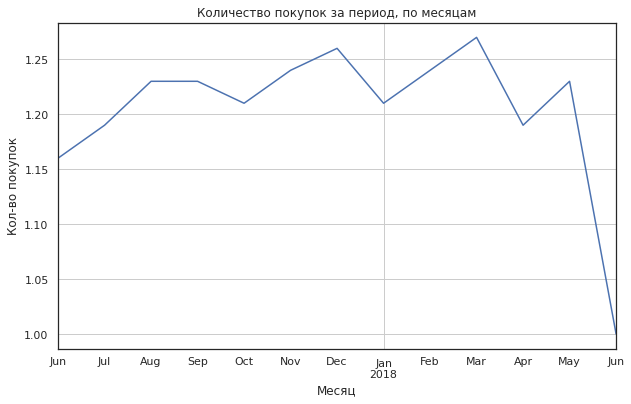

In [22]:
# добавим столбец с месяцами покупок, определим количество покупок по месяцам
order['buy_month'] = order['buy_ts'].astype('datetime64[M]')

# сгруппируем по месяцам и посчитаем количество уникальных покупателей
order_per_user = order.groupby('buy_month').agg({'uid':['count', 'nunique']})

# переименуем столбцы
order_per_user.columns = ['n_orders', 'n_users']

# разделим количество покупок на количество покупателей
order_per_user['order_per_user'] = round(order_per_user['n_orders'] / order_per_user['n_users'],2)
# order_per_user.describe()

# построим график
order_per_user.describe()
order_per_user['order_per_user'].plot(figsize=(10,6), grid=True)
plt.ylabel('Кол-во покупок')
plt.xlabel('Месяц')
plt.title('Количество покупок за период, по месяцам')
plt.show()

Среднее значение количества покупок за весь период составляет 1.2. Увеличение покупок было в декабре 2017, феврале и марте 2018 гг., что может быть связано с праздниками и подготовкой к ним (Новый год, День защитника Отечества, Международный женский день), также наблюдается резкое снижение покупок в июне 2018.

**Рассчитаем среднее количество покупок на одного покупателя за период в 6 месяцев**

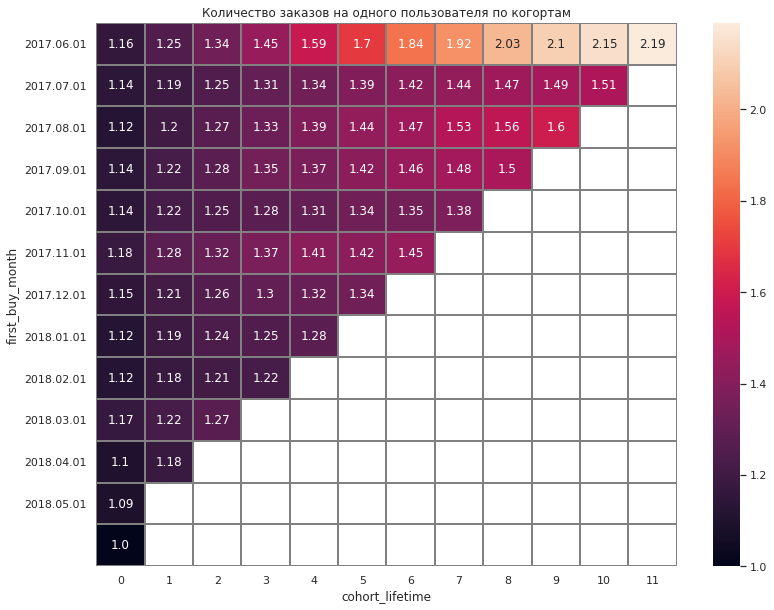

Cреднее количество покупок на одного покупателя за 6 месяцев: 1.44


In [23]:
orders_month = order[['buy_ts','revenue','uid']]

# выделим первый месяц покупки
first_buy = orders_month.groupby('uid')['buy_ts'].min().reset_index()

# переименуем колонки
first_buy.columns = ['uid', 'first_buy']

# соединим
orders_month = orders_month.merge(first_buy, on='uid')

# выделим месяца
orders_month['buy_month'] = orders_month['buy_ts'].astype('datetime64[M]')
orders_month['first_buy_month'] = orders_month['first_buy'].astype('datetime64[M]')

# сгруппируем по первому месяцу и по месяцу покупок
orders_month6 = (orders_month.
                groupby(['first_buy_month','buy_month'])
                .agg({'uid':'count', 'revenue':'sum'})
                .reset_index()
               )

# переименуем колонку uid
orders_month6 = orders_month6.rename(columns={'uid':'n_orders'})

# построим сводную таблицу и посмотрим изменение количества заказов по когортам в месяц
pivot_orders = (orders_month6
                .pivot_table(index='first_buy_month', columns='buy_month', 
                             values='n_orders', aggfunc='sum')
               )
pivot_orders.fillna('')

# найдем время жизни когорты
orders_month6['cohort_lifetime'] = orders_month6['buy_month']-orders_month6['first_buy_month']
orders_month6['cohort_lifetime'] = orders_month6['cohort_lifetime']/np.timedelta64(1,'M')
orders_month6['cohort_lifetime'] = orders_month6['cohort_lifetime'].round().astype('int')

# найдем количество покупателей в каждой когорте, т.е. сгруппируем покупки по первому месяцу
# и найдем количество уникальных пользователй методом nunique()
cohort_size = (orders_month
               .groupby('first_buy_month')['uid']
               .nunique()
               .reset_index()
               )

# переименуем колонки
cohort_size.columns = ['first_buy_month', 'n_buyers']

# соединим
orders_month6 = orders_month6.merge(cohort_size, on=('first_buy_month'), how='left')

# найдем количество заказов на одного пользователя
orders_month6['orders_per_user'] = orders_month6['n_orders']/orders_month6['n_buyers']

# построим сводную таблицу заказов на одного пользователя по когортам и месяцам жизни
pivot_ordes = (orders_month6
               .pivot_table(index='first_buy_month',
                            columns='cohort_lifetime',
                            values='orders_per_user',
                            aggfunc='mean').cumsum(axis=1).round(2)
              )
pivot_ordes.fillna('')

# построим сводную таблицу заказов на одного пользователя по когортам и месяцам жизни
pivot_ordes = (orders_month6
               .pivot_table(index='first_buy_month',
                            columns='cohort_lifetime',
                            values='orders_per_user',
                            aggfunc='mean').cumsum(axis=1).round(2)
              )
pivot_ordes.fillna('')

# создадим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 10))
plt.title('Количество заказов на одного пользователя по когортам')
sns.heatmap(pivot_ordes, annot=True, fmt='.3', linewidths=1, linecolor='gray',
            yticklabels=retention_pivot.index.strftime('%Y.%m.%d'))
plt.show()

# сделаем срез по когорте 2017.12.01 и выберем 6 месяцев
print('Cреднее количество покупок на одного покупателя за 6 месяцев:', 
      (pivot_ordes.loc[:'2017-12-01',:5][5].mean().round(2)))

* Cреднее количество покупок на одного покупателя за 6 месяцев: 1.44.

#### Какой средний чек?

**Рассчитаем средний чек и построим график, отражающий изменения метрики во времени**

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64


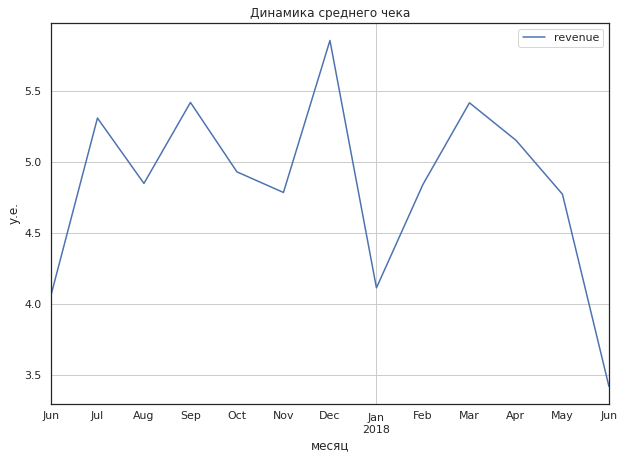

In [24]:
order['orders_month'] = order['buy_ts'].astype('datetime64[M]')
mean_chek_month = order.groupby('orders_month').agg({'revenue':'mean'})
mean_chek_month.plot(kind = 'line', 
                     grid=True, 
                     figsize=(10, 7))
plt.title('Динамика среднего чека')
plt.xlabel('месяц')
plt.ylabel('у.е.')

print(order['revenue'].describe())

Средний чек в месяц равен 4.999647 у.е. Средний чек увеличивается в декабре, что скорее всего связано с предновогодними походами на различные мероприятия и резко падает в январе, когда такие мероприятия становятся уже не интересны.

#### Сколько денег приносят? (LTV)

**Посмотрим, как меняется LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев и отразим изменения метрики во времени на графике**

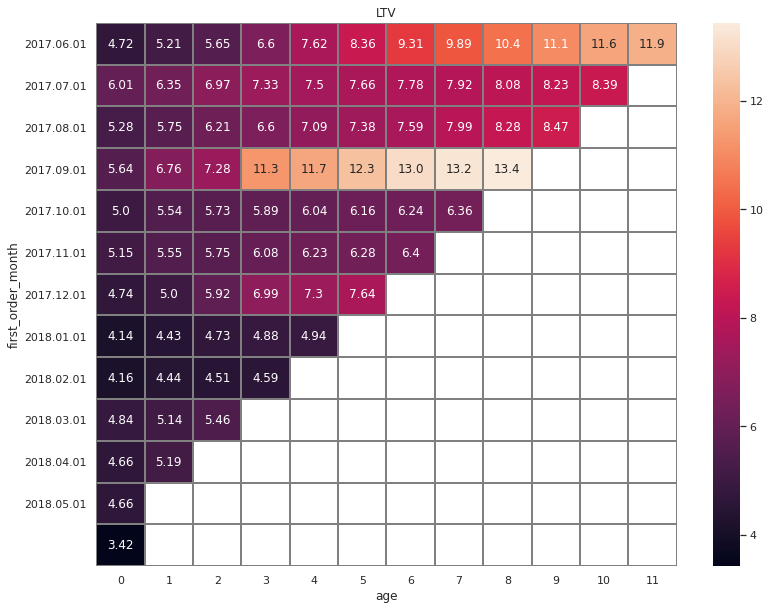

In [25]:
order = order[['buy_ts', 'revenue', 'uid']]
order['order_month'] = order['buy_ts'].astype('datetime64[M]')
cost['month'] = cost['data'].astype('datetime64[M]') 

# получим месяц первой покупки каждого пользователя
first_order = order.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order_month']

# посчитаем количество новых покупателей n_buyers за каждый месяц
cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# добавием в таблицу с заказами месяц первой покупки
orders_new = pd.merge(order, first_order, on='uid')

# сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

# добавим данные о том сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# найдем валовую прибыль, умножив выручку на маржинальность
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

# найдем LTV
report['ltv'] = report['gp'] / report['n_buyers']

# построим сводную таблицу и создадим тепловую карту
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output1 = output.cumsum(axis=1).round(2)
output1.fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 10))
plt.title('LTV')
sns.heatmap(output1, annot=True, fmt='.3', linewidths=1, linecolor='gray',
            yticklabels=retention_pivot.index.strftime('%Y.%m.%d'))
plt.show()

Первая (июньская) когорта самая стабильная - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт. Вызвано это тем, что именно эта когорта показывает лучший показатель Retention Rate. По четвертой когорте (сентябрьской) необходимо исследовать третий месяц ее жизни, так как видим всплеск месячного значения LTV, то есть они принесли в среднем со всех своих покупок больше денег.

**Посмотрим LTV по когортам**

,first_order_month,ltv
0,2017-06-01,11.879234
1,2017-07-01,8.386854
2,2017-08-01,8.471723
3,2017-09-01,13.435227
4,2017-10-01,6.360242
5,2017-11-01,6.395244
6,2017-12-01,7.639913
7,2018-01-01,4.940151
8,2018-02-01,4.587921
9,2018-03-01,5.455253


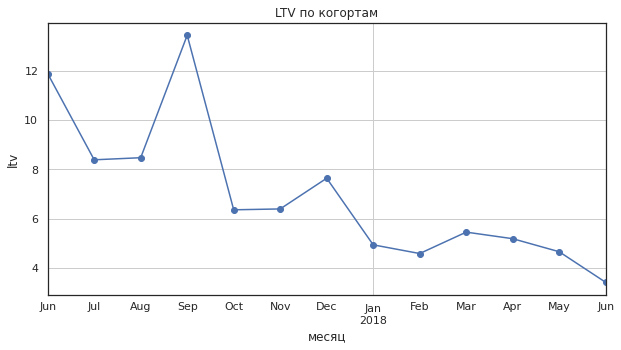

In [26]:
ltv_cohorts = report.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()
display(ltv_cohorts)

report.groupby('first_order_month')['ltv'].sum().plot(figsize=(10,5), 
                                                      grid=True, 
                                                      style='o-', 
                                                      title='LTV по когортам')
plt.xlabel('месяц')
plt.ylabel('ltv')
plt.show()

В среднем, каждый покупатель из декабрьской когорты принес по 7.6 у.е. выручки за 6 «месяцев жизни». Не принимая в расчет июньскую и сентябрьскую когорту, в целом прослеживается снижение прибыли на пользователя от когорте к когорте.

**Посмотрим LTV по когортам («прожившие» не менее 6 месяцев)**

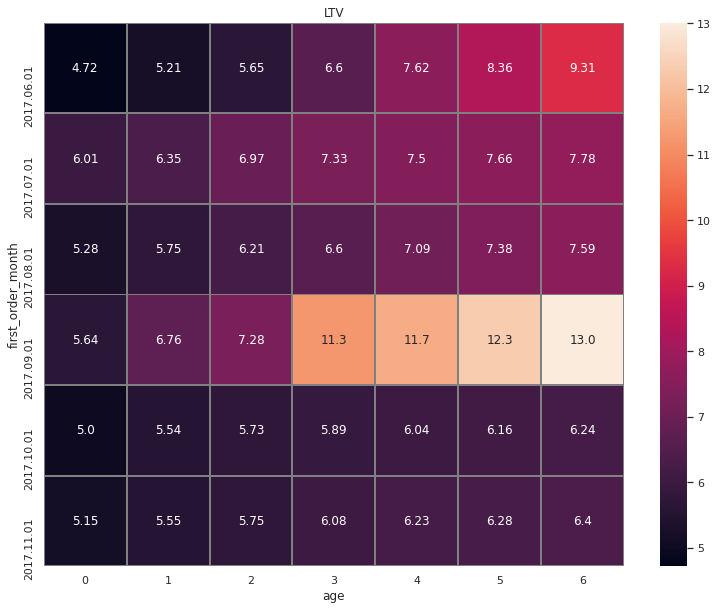

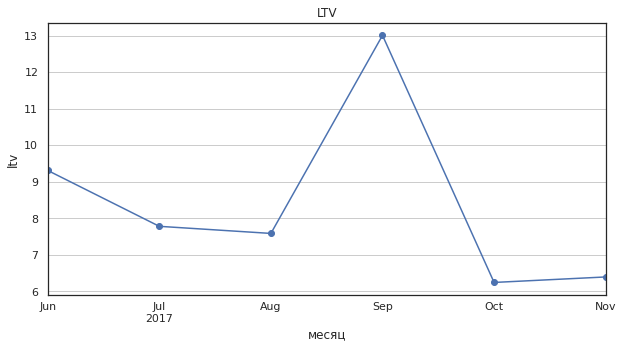

In [27]:
report_six_month = report[report['first_order_month'] <= '2017-11-01']
report_six_month = report_six_month[report_six_month['age'] <= 6]

output_six_month = report_six_month.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output_six_month = output_six_month.cumsum(axis=1).round(2) 
output_six_month.fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 10))
plt.title('LTV')

sns.heatmap(output_six_month, annot=True, fmt='.3', linewidths=1, linecolor='gray',
            yticklabels=output_six_month.index.strftime('%Y.%m.%d'))
plt.show()

ltv_six_month = report_six_month.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()
ltv_six_month.groupby('first_order_month')['ltv'].sum().plot(figsize=(10,5), grid=True, style='o-', title='LTV')
plt.xlabel('месяц')
plt.ylabel('ltv')
plt.show()

Больше всего прибыли в среднем принесли пользователи сентябрьской когорты.

**Посчитаем среднее LTV за 6 месяц отдельно**

In [28]:
ltv_6 = output.cumsum(axis=1)[5].mean()
ltv_6

7.969052630207336

Средний LTV по когортам, «прожившим» не менее 6 месяцев: 7.97 у.е.

**Вывод**

**1. Когда люди начинают покупать?**
* Среднее время с первой сессии до первой покупки: 16 дней.
* Медиана времени с первой сессии до первой покупки: 16 минут.
* Мода времени с первой сессии до первой покупки: 1 минута.

Как правило, основная масса покупает сразу.

**2. Сколько раз покупают за период?**

* Cреднее количество покупок на одного покупателя за за 6 месяцев: 1.44.

**3. Какой средний чек?**

Средний чек в месяц равен 4.999647 у.е. Средний чек увеличивается в декабре, что скорее всего связано с предновогодними походами на различные мероприятия и резко падает в январе, когда такие мероприятия становятся уже не интересны.

**4. Сколько денег приносят? (LTV)**

Первая (июньская) когорта самая стабильная - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт. Вызвано это тем, что именно эта когорта показывает лучший показатель Retention Rate. По четвертой когорте (сентябрьской) необходимо исследовать третий месяц ее жизни, так как видим всплеск месячного значения LTV. Средний LTV по когортам, «прожившим» не менее 6 месяцев: 7.97 у.е.

### Маркетинговые метрики

* Сколько денег потратили? Всего / на каждый источник / по времени
* Сколько стоило привлечение одного покупателя из каждого источника?
* На сколько окупились расходы?

#### Сколько денег потратили? Всего / на каждый источник / по времени

Общая сумма расходов составила: 329131.62 у.е.
Выручка составила: 252057.20 у.е.
Прибыль/убыток: -77074.42 у.е.


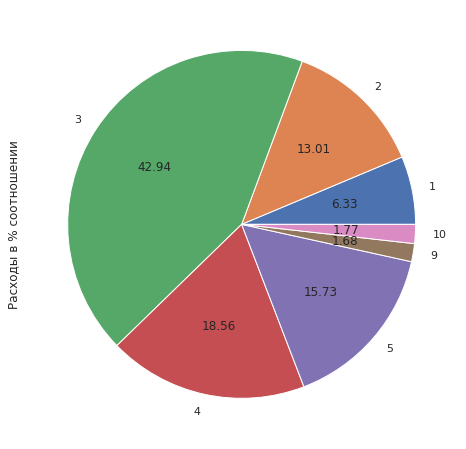

In [29]:
print('Общая сумма расходов составила: {:.2f} у.е.'.format(cost['costs'].sum()))
print('Выручка составила: {:.2f} у.е.'.format(order['revenue'].sum()))
marja_afish = order['revenue'].sum() - cost['costs'].sum()
print('Прибыль/убыток: {:.2f} у.е.'.format(marja_afish))
cost.groupby('source_id').sum().plot(y = 'costs', autopct='%.2f', kind = 'pie', figsize = (8, 8), legend = False)
plt.ylabel('Расходы в % соотношении')
plt.show()

Общая сумма расходов на маркетинг составила 329131.62 у.е. Большую часть расходов потратили на 3 источник, меньшую - на 9.

**Посмотрим сколько потратили на каждый источник**

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


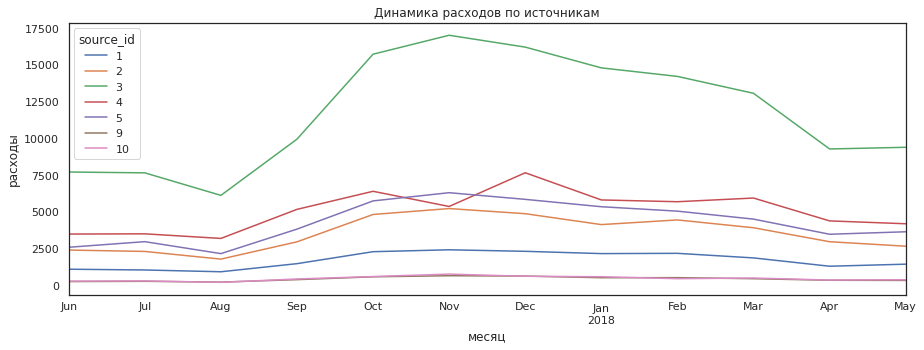

In [30]:
print(cost.groupby('source_id').agg({'costs':'sum'}))

costs_pivot = cost.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(kind='line', figsize = (15,5), title = 'Динамика расходов по источникам')
plt.ylabel('расходы')
plt.xlabel('месяц')
plt.show()

* На первый источник потратили: 20833.27 у.е.
* На второй источник потратили: 42806.04 у.е.
* На третий источник потратили: 141321.63 у.е.
* На четвертый источник потратили: 61073.60 у.е.
* На пятый источник потратили: 51757.10 у.е.
* На девятый источник потратили: 5517.49 у.е.
* На десятый источник потратили: 5822.49 у.е.

То есть больше всего потратили на 3 источник, потом идут 4, 5, 2, 1, 10 и 9 источники.

               costs
month               
2017-06-01  18015.00
2017-07-01  18240.59
2017-08-01  14790.54
2017-09-01  24368.91
2017-10-01  36322.88
2017-11-01  37907.88
2017-12-01  38315.35
2018-01-01  33518.52
2018-02-01  32723.03
2018-03-01  30415.27
2018-04-01  22289.38
2018-05-01  22224.27


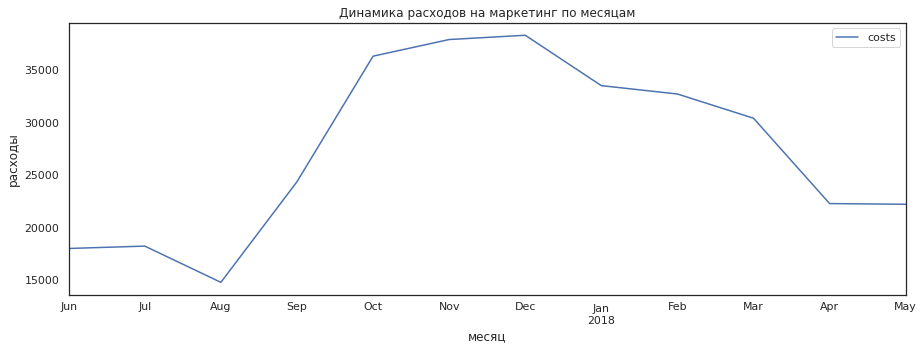

In [31]:
print(cost.groupby('month').agg({'costs':'sum'}))

cost.pivot_table(index = 'month', values = 'costs', aggfunc = 'sum').plot(title = 'Динамика расходов на маркетинг по месяцам', figsize = (15,5))
plt.ylabel('расходы')
plt.xlabel('месяц')
plt.show()

Больше всего расходов на маркетинг было в период с октября по декабрь 2017 г (пик в декабре), самый минимум - в августе. Расходы по всем источникам увеличиваются осенью, пика достигают в декабре, далее идет плавное снижение, исключением является 4 источник, где в ноябре идет снижение и далее подъемы (декабрь, март, май) и спады (январь, февраль, апрель). Расходы на 4 источник не соответствуют тенденция суммарных расходов. Также мы тратим примерно одинаковую сумму в течение всего года на источники 9 и 10, большую часть денег мы тратим на 3 источник, а меньше всего - на 9 источник.

**Отобразим общую динамику расходов одновременно с затратами с разбивкой по источникам**

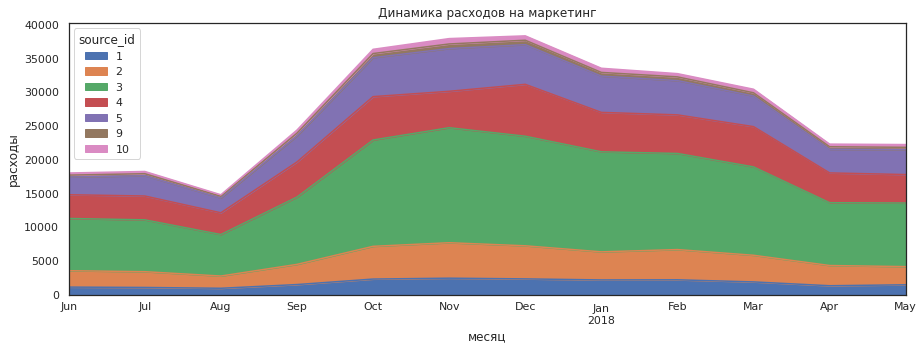

In [32]:
costs_pivot = cost.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(kind='area', figsize = (15,5), title = 'Динамика расходов на маркетинг')
plt.ylabel('расходы')
plt.xlabel('месяц')
plt.show()

#### Сколько стоило привлечение одного покупателя из каждого источника?

**Стоимость привлечение одного покупателя из каждого источника**

,source_id,price_for_client
2,3,13.49
1,2,12.21
4,5,7.47
0,1,7.19
3,4,5.93
7,9,5.07
8,10,4.38


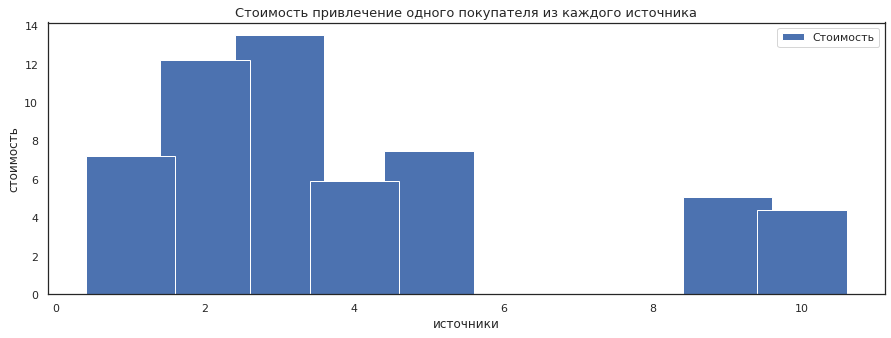

In [33]:
# покупатели по каналам
visits_sorted = visit.sort_values(by='start_ts')

# затраты по каналам
costs_per_source = cost.groupby('source_id').agg({'costs': 'sum'})

# выручка по каналам
first_source_per_user = visits_sorted.groupby('uid').agg({'source_id': 'first'})

client_per_source = order.merge(first_source_per_user, on='uid')

# суммируем колисчество покупателей с канала
client_per_source = client_per_source.groupby('source_id').agg({'uid': 'nunique'})

# уникальные пользователи по каналам
# общее количество визитов с каждого источника
uid_per_source = visits_sorted.groupby('source_id').agg({'uid': 'nunique'})

rev_per_source = order.merge(first_source_per_user, on='uid')
rev_per_source = rev_per_source.groupby('source_id').agg({'revenue': 'sum'})

rev_uid_costs_per_source = pd.concat([costs_per_source, rev_per_source, uid_per_source, client_per_source],axis=1).fillna(0)
rev_uid_costs_per_source = rev_uid_costs_per_source.reset_index()

rev_uid_costs_per_source.columns = ['source_id', 'costs', 'revenue', 'uid', 'clients']

# посчитаем стоимость привлечения одного клиента по каждому из каналов рекламы
rev_uid_costs_per_source['price_for_client'] = (rev_uid_costs_per_source['costs']/rev_uid_costs_per_source['clients']).round(2)

# удалим 5 и 6
cost_buyer_each_source = rev_uid_costs_per_source[['source_id', 'price_for_client']].sort_values(by='price_for_client', ascending=False)
cost_buyer_each_source  = cost_buyer_each_source.drop([5, 6])
display(cost_buyer_each_source)

# построим график
plt.figure(figsize=(15, 5))
plt.bar(cost_buyer_each_source['source_id'], cost_buyer_each_source['price_for_client'], width=1.2)
plt.title('Стоимость привлечение одного покупателя из каждого источника', fontsize=13)
plt.xlabel('источники')
plt.ylabel('стоимость')
plt.legend(['Стоимость'])
plt.show()

Дороже всего вышли клиенты, привлеченные через 3, 2, 5 источников, а дешевле - через 1, 4, 9 и 10 источники.

**Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках**

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,5.92,10.33,12.12,8.51,6.81,4.19,3.31
2017-07-01,6.10,10.80,14.62,6.74,6.86,5.71,6.22
2017-08-01,7.44,13.03,16.69,9.09,5.84,3.61,5.96
2017-09-01,5.89,11.85,12.20,8.42,6.23,4.04,5.23
2017-10-01,6.16,10.51,12.73,5.21,5.80,3.81,2.92
2017-11-01,6.38,10.58,13.00,4.26,8.19,3.69,5.87
2017-12-01,6.03,10.49,11.16,5.01,6.86,4.42,6.80
2018-01-01,7.46,11.39,13.11,4.96,7.46,4.72,6.27
2018-02-01,6.68,11.56,11.42,4.54,6.50,4.45,3.59


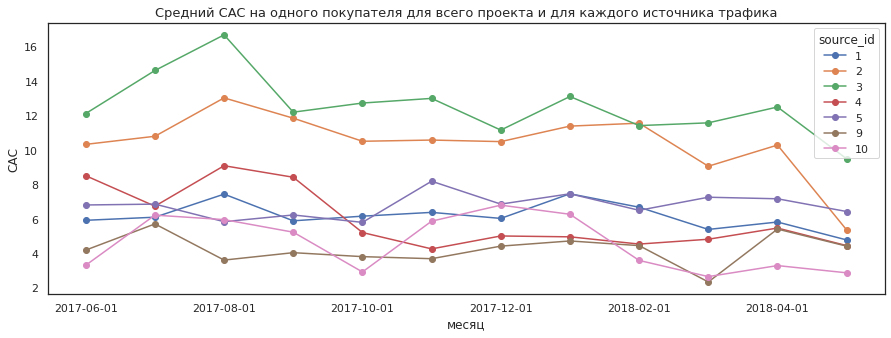

In [34]:
# покупатели по каналам и месяцам
visit_copy = visit.copy()
visits_sorted = visit_copy.sort_values(by='start_ts')
first_source_per_user = visits_sorted.groupby('uid').agg({'source_id': 'first', 'start_ts': 'first'})

order_copy = order.copy()
client_per_source = order_copy.merge(first_source_per_user, on='uid')
client_per_source['month'] = client_per_source.buy_ts.dt.strftime('%Y-%m-01') 

# суммируем количество покупателей с канала по месяцам
client_per_source = client_per_source.groupby(['source_id', 'month']).agg({'uid': 'nunique'})
client_per_source = client_per_source.rename(columns={"uid": "amount"})

# ежемесячные затраты по каналам
cost_copy = cost.copy()
cost_copy['month'] = cost_copy.data.dt.strftime('%Y-%m-01')

costs_per_source_monthly = cost_copy.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()

# посчитаем САС
monthly_clients_costs_per_source = costs_per_source_monthly.merge(client_per_source, on=['source_id', 'month'])
monthly_clients_costs_per_source['CAC'] = (monthly_clients_costs_per_source.costs / monthly_clients_costs_per_source.amount).round(2)

pivot_CAC = monthly_clients_costs_per_source.pivot_table(index = 'month', columns = 'source_id', values = 'CAC', aggfunc = 'sum')
display(pivot_CAC)

graph = pivot_CAC.plot(figsize = (15,5), title="Динамика САС", marker='o')
plt.title('Средний CAC на одного покупателя для всего проекта и для каждого источника трафика', fontsize=13)
plt.xlabel('месяц')
plt.ylabel('САС')
plt.show()

#### На сколько окупились расходы?

**Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.**

**Посмотрим LTV, СAC и ROMI**

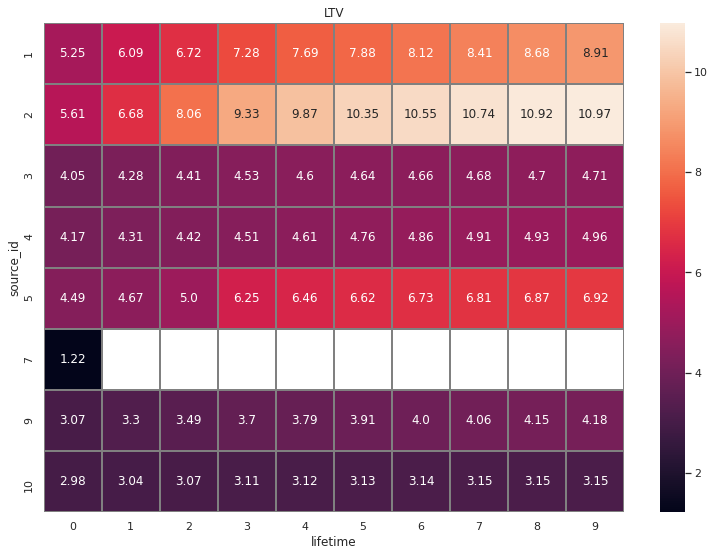

In [35]:
sources = visit.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()

# соединим первые покупки и источники 
payers = order.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})

# считаем временные промежутки между первыми покупками
ltv = payers.merge(order, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)

# построим сводную таблицу с суммой доходов из конкретного источника за период времени промежуток времени, когда клиентом была сделална первая покупка
report_ltv = ltv.groupby(['lifetime','source_id']).agg({'uid':'nunique', 'revenue': 'sum' }).reset_index()
report_ltv.columns = ['lifetime', 'source_id', 'n_buyers', 'revenue']

# посчитаем покупателей пришедших из каждого источника за все время
report_ltv_n_buyers = report_ltv.groupby('source_id').agg({'n_buyers':'sum'}).reset_index()
report_ltv_n_buyers.columns = ['source_id', 'n_buyers_sum']

# добавим столбец с общим доходом
margin_rate = 1
report_ltv['gp'] = report_ltv ['revenue'] * margin_rate

# соединим таблицу с общим количеством покупателей из каждого источника за весь период
report_ltv = pd.merge(report_ltv, report_ltv_n_buyers, on='source_id')
report_ltv = report_ltv[report_ltv['lifetime'] <= 9 ] #9 месяцев чтобы полностью вошли все рекламные компании

# добавим столбец с LTV
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers_sum']
output_ltv = report_ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'ltv', aggfunc = 'mean')
output_ltv = output_ltv.cumsum(axis=1).round(2)
output_ltv.fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output_ltv, annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.show()

LTV выше у 2, 1 и 5 источников, затем идет 4, 3, 9 и 10 источники.

**Посчитаем CAC каждого источника**

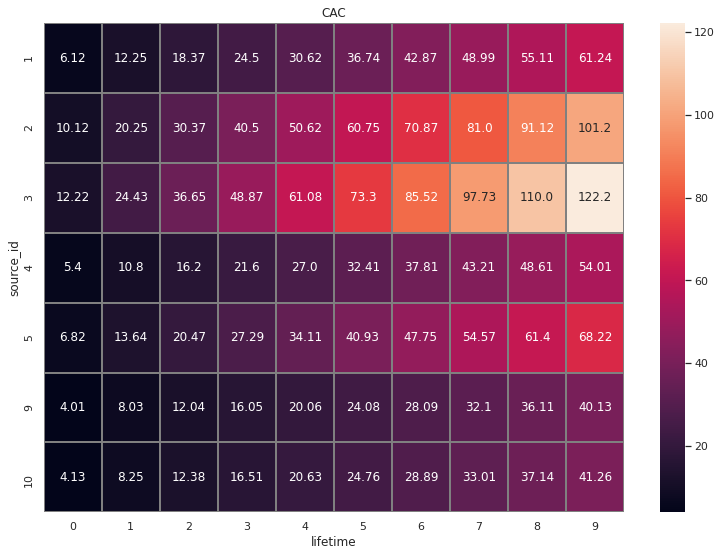

In [36]:
# сгруппируппируем
source_id_costs = cost.groupby('source_id').sum()

# соеденим таблицы
report_cac = pd.merge(report_ltv, source_id_costs, on=['source_id'])

# посчитаем CAC
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers_sum']

output_cac = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values = 'cac', aggfunc = 'mean')

output_cac = output_cac.cumsum(axis=1).round(2)
output_cac.fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('CAC')
sns.heatmap(output_cac, annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.show()

CAC выше у 3, 2 и 5 ичточников, затем идет 1, 4, 9 и 10.

**Посчитаем ROMI**

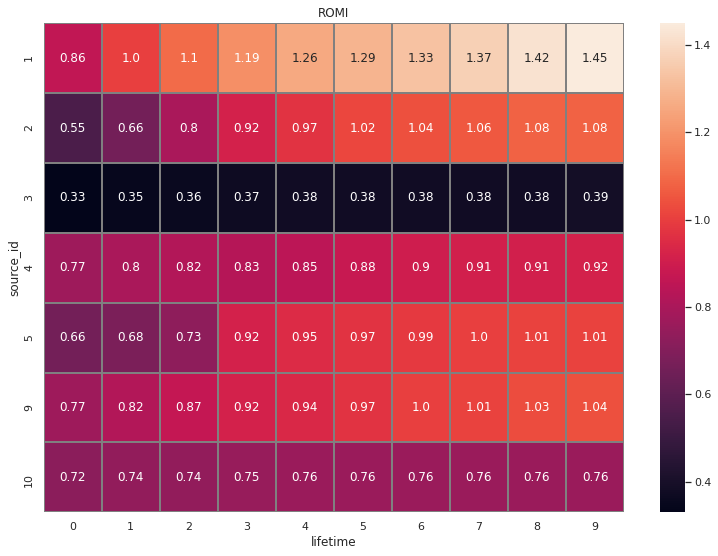

In [37]:
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']

output_romi = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values = 'romi', aggfunc = 'mean')
output_romi = output_romi.cumsum(axis=1).round(2) 
output_romi.fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(output_romi, annot=True, fmt='.3', linewidths=1, linecolor='gray')
plt.show()

* Лучше всего окупается 1, 2 источники, затем 9 и 5 источники.
* Источники под номером 3, 10 и 4 не окупаются.

In [38]:
output_romi.mean(axis=0)

lifetime
0    0.665714
1    0.721429
2    0.774286
3    0.842857
4    0.872857
5    0.895714
6    0.914286
7    0.927143
8    0.941429
9    0.950000
dtype: float64

В среднем с 6-7 месяца близки к окупаемости, но за счет самых проблемных по окупаемости 3 и 10 рекламных компаний, в среднем не окупается.

**Рассчитаем стоимость привлечения клиента (САС) каждой когорты**

In [39]:
# посчитаем расходы за месяц
monthly_costs = cost.groupby('month').sum()
#report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')

# добавим данные о расходах и посчитаем CAC:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = (report_new['costs'] / report_new['n_buyers'])

**Рассчитаем возврат на инвестиции (ROMI) по каждой когорте**

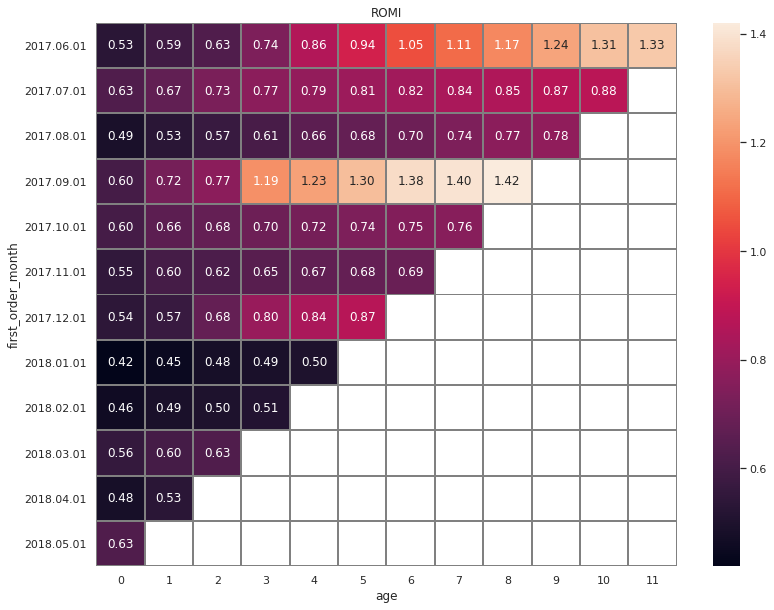

In [40]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi2 = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)

sns.set(style='white')
plt.figure(figsize=(13, 10))
plt.title('ROMI')
sns.heatmap(output_romi2, annot=True, fmt='.2f', linewidths=1, linecolor='gray',
           yticklabels=retention_pivot.index.strftime('%Y.%m.%d'))
plt.show()

Большинство когорт на данный момент не окупились, окупились только июльская и сентябрьская когорты:
* 2017-06-01 когорта окупилась (ROMI = 1.05).
* 2017-07-01 когорта не окупилась.
* 2017-08-01 когорта не окупилась.
* 2017-09-01 когорта окупилась (ROMI = 1.19).
* 2017-10-01 когорта не окупилась.
* 2017-11-01 когорта не окупилась.

**Посмотрим среднее значение ROMI по когортам**

In [41]:
output_romi2.mean()

age
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

Расходы окупаются только через 8 месяцев.

**Вывод**

**1. Сколько денег потратили? Всего / на каждый источник / по времени**

Общая сумма расходов на маркетинг составила 329131.62 у.е.:
* На первый источник потратили: 20833.27 у.е.
* На второй источник потратили: 42806.04 у.е.
* На третий источник потратили: 141321.63 у.е.
* На четвертый источник потратили: 61073.60 у.е.
* На пятый источник потратили: 51757.10 у.е.
* На девятый источник потратили:  5517.49 у.е.
* На десятый источник потратили: 5822.49 у.е.

Больше всего потратили на 3 источник, потом идут 4, 5, 2, 1, 10 и 9 источники. 

Выручка составила: 252057.20 у.е. Таким образом, мы получили убыток: -77074.42 у.е.

Больше всего расходов на маркетинг было в период с октября по декабрь 2017 г (включительно). Расходы по всем источникам увеличиваются осенью, пика достигают в декабре, далее идет плавное снижение, исключением является 4 источник, где в ноябре идет снижение и далее подъемы (декабрь, март, май) и спады (январь, февраль, апрель). Расходы на 4 источник не соответствуют тенденция суммарных расходов. Также мы тратим примерно одинаковую сумму в течение всего года на источники 9 и 10, большую часть денег мы тратим на 3 источник, а меньше всего мы тратим на 9 источник. 

**2. Сколько стоило привлечение одного покупателя из каждого источника?**

* Дороже всего нам вышли клиенты, привлеченные через 3, 2, 5 источников, а дешевле - через 1, 4, 9 и 10 источники.

**3. На сколько окупились расходы?**

* Лучше всего окупается 1, 2 источники, затем 9 и 5 источники.
* Источники под номером 3, 10 и 4 не окупаются.

**Возврат на инвестиции (ROMI) по каждой когорте**

Большинство когорт на данный момент не окупились, окупились только июльская и сентябрьская когорты:
* 2017-06-01 когорта окупилась (ROMI = 1.05).
* 2017-07-01 когорта не окупилась.
* 2017-08-01 когорта не окупилась.
* 2017-09-01 когорта окупилась (ROMI = 1.19).
* 2017-10-01 когорта не окупилась.
* 2017-11-01 когорта не окупилась.

## Общий вывод

**Куда и сколько стоит вкладывать денег?**

**Определим источники трафика на которые маркетологам стоит делать упор**

Маркетинговые затраты не окупаются. Сейчас почти половина бюджета выделена на источник, который приносит самых дорогих клиентов и имеет самый низкий ROMI по сравнению с остальными (3 источник). Возможно, от него стоит совсем отказаться, потому что он вносит большой вклад в убыточность (самые высокие затраты идут на 3 и 4 источники, LTV по ним ниже, чем по 2 и 1 источникам). 10 источник не окупается, мы сейчас тратим на него больше, чем на 9 источник, при этом LTV по нему ниже.

Таким образом, следует сократить затраты на привлечение клиентов через 3, 4 и 10 источники и перераспределить эти средства между 1, 2, 9 источниками.

**Выводы после подсчета метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции**

**Продуктовые метрики**
* Среднее количество пользователей в день (DAU): 907 человек, в неделю (WAU): 4911 человек, в месяц (MAU): 23228 человек.
* В день в среднем проходит 987 сессий. Средняя продолжительность пользовательской сессии (ASL) составляет 10.7 минут, мода составляет 1 минуту,  медиана - 5 минут. Ключевым значением для нас является медиана. Провести 5 минут на сайте можно, когда человек завершает покупку переходом на Яндекс.Афишу и оплачивает ее там, либо заранее знает какую покупку он хочет совершить. В целом, сессии достаточно непродолжительные. При этом один пользователь пользуются сервисом в среднем один раз в день. 

* Retention Rate низкий. Количество вернувшихся клиентов в среднем (Retention Rate) в первой когорте составляет 6.5 % - самое большое удержание. Во второй, третьей и последующих когортах Retention Rate убывает быстрее.

**Метрики электронной коммерции**
* Медиана времени с первой сессии до первой покупки: 16 минут, что говорит о том, что, вероятно, чаще пользователи уже знают какие билеты они хотят приобрести.

* Cреднее количество покупок на одного покупателя за 6 месяцев: 1.44.

* Средний чек в месяц равен 4.999647 у.е. Средний чек увеличивается в декабре, что скорее всего связано с предновогодними походами на различные мероприятия и резко падает в январе, когда такие мероприятия становятся уже не интересны.

* Июльская (2017-06-01) когорта самая стабильная, так как практически в каждом месяце она показывала лучший результат по LTV среди всех когорт. По сентябрьской (2017-09-01) когорте необходимо исследовать третий месяц ее жизни, так как был всплеск месячного значения LTV. В целом же прослеживается снижение прибыли на пользователя от когорте к когорте.

**Маркетинговые метрики**

* Общая сумма расходов на маркетинг составила 329131.62 у.е. Больше всего потратили на 3 источник, потом идут 4, 5, 2, 1, 10 и 9 источники. Больше всего расходов на маркетинг было в период с октября по декабрь 2017 г (пик в декабре), самый минимум - в августе. 

* Дороже всего нам вышли клиенты, привлеченные через 3, 2, 5 источников, а дешевле - через 1, 4, 9 и 10 источники.

* Из всех когорт окупились только июльская когорта и сентябрьская.
* Лучше всего окупается 1, 2 источники, затем 9 и 5 источники. Источники под номером 3, 10 и 4 не окупаются.

**Итоги когортного анализа. Самые перспективные для компании когорты клиентов**

У нашего сервиса низкий Retention Rate. Возможно, что пользователи больше предпочитают другой сервис для выбора и покупки билетов. Количество вернувшихся клиентов в среднем в первой (июньской) когорте составляет 6.5 %, в то время как во второй, третьей и последующих когортах Retention Rate убывает быстрее, то есть количество возвращающихся клиентов падает, особенно в зимние месяцы. Таким образом, получается, что летние посетители наиболее часто возвращаются на сайт. Так июньская когорта самая стабильная - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт, поэтому имеет смысл обратить внимание на нее. По сентябрьской когорте необходимо исследовать третий месяц ее жизни, так как наблюдался всплеск месячного значения LTV, то есть пользователи принесли в среднем со всех своих покупок больше денег.